In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import math as mt 
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LogNorm
import seaborn as sns

In [2]:
# Partindo de dados observacionais do SDSS vamos carregar a tabela do site: http://skyserver.sdss.org/dr17/
# Os parametros ultilizados foram:
# select top 10000 p.ra, p.dec,p.l, p.b, p.u, p.g, p.r, p.i, p.z, s.z as redshift
# from galaxy p, specobj s
# where p.objid=s.bestobjid and p.g < 18 and s.z BETWEEN 0.001 AND 0.02

# Fazendo o import dos dados
df = pd.read_csv('Skyserver_SQL5_21_2022 10_06_28 PM.csv', header=1, encoding='ISO-8859-1')
print(df.head())

           ra        dec           l          b         u         g         r  \
0  186.580377   1.019731  288.893181  63.204762  17.69350  16.64512  16.32172   
1  159.606276  -0.017860  247.766527  48.083129  18.19884  16.96567  16.48693   
2  172.450028   1.137805  262.527202  57.459147  17.85741  16.75260  16.36844   
3   10.298328  15.052698  119.252410 -47.745769  18.02372  16.67295  15.88370   
4   52.465582  -7.674991  192.984164 -47.769121  18.88252  17.86859  17.56828   

          i         z  redshift  
0  16.17824  16.07378  0.004153  
1  16.26755  16.16388  0.019085  
2  16.17404  16.09332  0.016655  
3  15.45716  15.13870  0.016882  
4  17.40854  17.29528  0.012527  


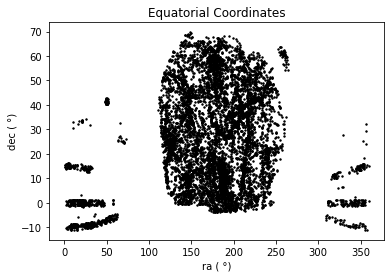

In [3]:
#Seleção da amostra de galáxias#
#Plotando as coordenadas equatoriais é possível notar que as observações do SDSS se concentram ao redor do pólo norte Galáctico#
plt.scatter(df['ra'], df['dec'], color='black', s=2)
plt.title('Equatorial Coordinates')
plt.xlabel('ra ( °)')
plt.ylabel('dec ( °)')
plt.show()

Histograma de magnitude aparentes g

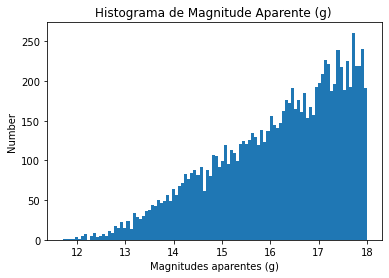

In [4]:
# Fazendo o plot do histograma das magninitudes aparentes, na banda g
maginitude_g = np.array(df['g'])

plt.hist(maginitude_g , bins=100)
plt.title('Histograma de Magnitude Aparente (g) ')
plt.ylabel('Number')
plt.xlabel('Magnitudes aparentes (g)')
plt.show()

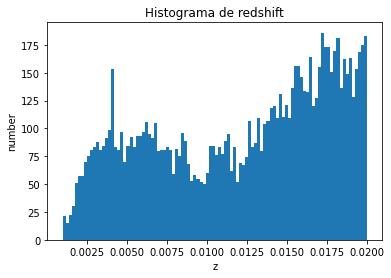

In [5]:
# Fazendo o histograma do redshifts das galaxias dos dados da tabela.
redshift = np.array(df['redshift'])

plt.hist( redshift, bins=100)
plt.title('Histograma de redshift')
plt.ylabel('number')
plt.xlabel('z')
plt.show()

Histograma distância :

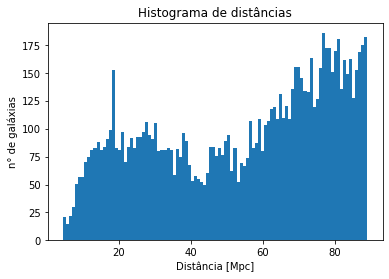

In [6]:
# Para caclular a distancia das galaxias vamos usar a lei de Hubble d = (z*c) / H0
H0 = 67.321       # km/s/Mpc
c = 2.9979*10**5    # km/s
distancia = redshift * c / H0 # Mpc
df['dist'] = distancia

plt.hist(distancia, bins=100)
plt.title('Histograma de distâncias')
plt.ylabel('n° de galáxias')
plt.xlabel('Distância [Mpc]')

plt.show()

Diagrama cor-magnitude

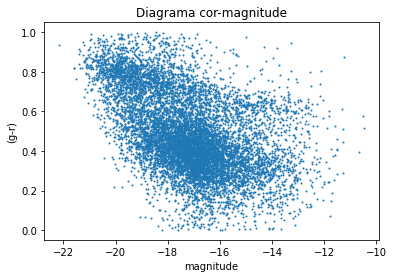

In [7]:
# Agora a ideia é selecionarmos as galaxias mas luminosas para realizar o calculo do  função de luminosidade de schechter's 
# Para isso primeiro vou plotar o diagrama de cores da amostra selecionada
# Então vamos fazer por primeiro a calculo da magnitude absoluta de cada um da amostra
df['Mg'] = df['g'] - 5*np.log10(10**6*df['dist']) + 5
# Trasformando os dados do pandas em array.
Mg = np.array(df['Mg'])
g = np.array(df['g'])
r = np.array(df['r'])
cor = np.array(g-r)
grafic_cond = np.where(((g-r)<1.0) & ((g-r)>0.0))

plt.scatter(Mg[grafic_cond], (g-r)[grafic_cond], s=1)
plt.yticks(np.arange(0, 1.2, .2))
plt.title('Diagrama cor-magnitude')
plt.ylabel('(g-r)')
plt.xlabel('magnitude')
plt.show()

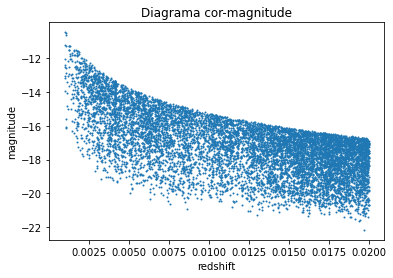

In [11]:
#  Fazendo um gráfico de magnitude absoluta em função do redshift
plt.scatter(redshift[grafic_cond], Mg[grafic_cond], s=1)
plt.yticks(np.arange(-22, -10,2))
plt.title('Diagrama cor-magnitude')
plt.ylabel('magnitude')
plt.xlabel('redshift')
plt.show()

In [8]:
# Com o diagrama das cores já plotado agora vamos selecionar apenas as galáxias mais azuis e luminosas a partir do gráfico co-magnitude anterior
# Aqui basta fazer um filto para cada cor
Mg_int = Mg
cor_int = cor
# O filtro
intervalo = np.where( (Mg < -16) & (cor < 0.6) )
Mg = Mg[intervalo]
redshift = redshift[intervalo]
cor = cor[intervalo]

# Filtro para as galaxias azuis
grafic_azul = np.where((cor<1.0) & (cor>0.0) )

# Filtro para as galaxias vermelhas
grafic_vermelho = np.where(((g-r)<1.0) & ((g-r)>0.0))

# Filtro para as galaxias de pouca luminosidade, no caso colocarei elas como cor cinza no gráfico
grafic_cinza = np.where(((g-r)<1.0) & ((g-r)>0.0) & (Mg_int>-16))

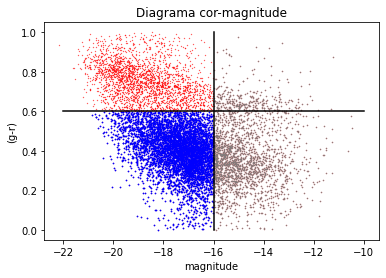

In [9]:
# Aqui na plotagem, para ficar mas visivel então irei separar no gráfico em 4 partes.
plt.plot([-16, -16], [0.0,1.0], color='black')
plt.plot([-22, -10], [0.6, 0.6], color='black')
plt.yticks(np.arange(0, 1.2, .2))

# Plot do gráfico:
plt.title('Diagrama cor-magnitude')
plt.scatter(Mg_int[grafic_vermelho], cor_int[grafic_vermelho], s=0.08, color='red')
plt.scatter(Mg_int[grafic_cinza], cor_int[grafic_cinza], s=0.2, color='gray')
plt.scatter(Mg[grafic_azul], cor[grafic_azul], s=0.5, color='blue')
plt.ylabel('(g-r)')
plt.xlabel('magnitude')
plt.show()

In [10]:
# Desta maneira destacando o gráfico de cor-magnitude, pode-se verificar que onde (em z) é predominantemente as galáxias mais fracas -> Mg = −16.
# Enfim vamos fazer o calculo medindo a densidade numérica de galáxias em intervalos de magnitude absoluta 
# E ajuste função de Schechter

bin = (np.max(Mg) - np.min(Mg))/15 # intervalo
i = np.min(Mg)
num_gal = []
Mg_mean = []
while i < np.max(Mg):
    i_plus = i+bin
    cond = np.where( (Mg>=i) & (Mg<i_plus) )
    num_gal.append(len(Mg[cond]))
    Mg_mean.append(np.mean(Mg[cond]))
    i=i+bin

    
num_gal = np.array(num_gal)
Mg_mean = np.array(Mg_mean)

# Aqui tambem vamos ir atrás de descobrir os valores de phiStar , alpha 

dmax = np.max(distancia) 
Omega = mt.pi 
V = Omega/3 * dmax**3

phi = num_gal/(V*bin)

# ajuste função de Schechter

def schechterM(magnitude, phiStar, alpha, MStar):  
    MStarMinM = 0.4 * (MStar - magnitude) 
    return np.log10(0.4 * np.log(10.0) * phiStar * 10.0**(MStarMinM * (alpha + 1.0)) * np.exp(-10.0**MStarMinM)) 

params, cov = curve_fit(schechterM, Mg_mean, np.log10(phi), p0 = [0.1, 0, -20])

# Obtendo  as constantes phiStar ,alpha , M∗, L∗
phiStar = params[0]
alpha   = params[1]
MStar   = params[2]

LStar = 10**((-MStar+4.77)/2.5)

print("phiStar = ",phiStar)
print("alpha   = ",alpha)
print("MStar   = ",MStar)
print("LStar   =", LStar)

phiStar =  0.002278678526440858
alpha   =  -1.161296287299312
MStar   =  -19.105269977326294
LStar   = 3549016275.003019


C:\Users\pingu\AppData\Local\Temp/ipykernel_15460/1930088550.py:31: RuntimeWarning: invalid value encountered in log10
  return np.log10(0.4 * np.log(10.0) * phiStar * 10.0**(MStarMinM * (alpha + 1.0)) * np.exp(-10.0**MStarMinM))


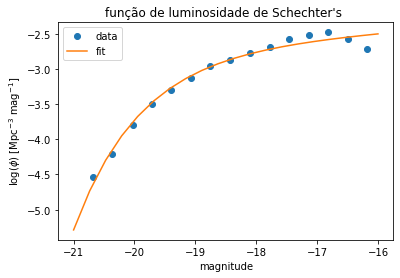

In [11]:
# Agora plotando o gráfico comparatorio da função de luminosidade a as magnitudes
xfit = np.linspace(-21, -16,20)
yfit = schechterM(xfit, phiStar, alpha, MStar)

fig, ax = plt.subplots()

plt.plot(Mg_mean, np.log10(phi), 'o', label='data')
plt.plot(xfit, yfit, label='fit')
plt.legend()

plt.xlabel('magnitude')
plt.ylabel('log($\phi$) [Mpc$^{-3}$ mag$^{-1}$]')
plt.title("função de luminosidade de Schechter's ")

plt.show()